##Data collection

In [3]:
import pandas as pd
df=pd.read_csv('SOCR-HeightWeight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


##Preparing

In [5]:
df=df.drop('Index', axis = 1)

In [6]:
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [7]:
df.dtypes

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [8]:
df[df['Height(Inches)']<=0]

,Height(Inches),Weight(Pounds)


In [9]:
df[df['Weight(Pounds)']<=0]

,Height(Inches),Weight(Pounds)


In [10]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1b19be85dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b19be86330>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b19be85ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b19be868d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b19be86ba0>],
 'means': []}

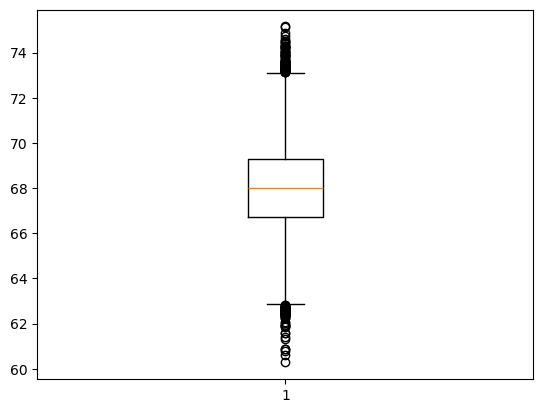

In [11]:
plt.boxplot(df['Height(Inches)'])

In [12]:
import numpy as np
def detect_outliers_zscore(data):
  outliers = []
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for x in data:
    z_score = (x-mean)/std
    if (np.abs(z_score) > thres):
      outliers.append(x)
  return outliers


In [13]:
outliers_list = detect_outliers_zscore(df['Height(Inches)'])

In [14]:
for i in outliers_list:
  df = df.drop(df[df['Height(Inches)']==i].index[0])

In [15]:
df.shape

(24949, 2)

In [16]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [17]:
x=df.drop('Weight(Pounds)', axis=1)

In [18]:
x

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [19]:
y=df[['Weight(Pounds)']]

In [20]:
y

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.33, random_state=1)

In [23]:
xtrain.shape

(16715, 1)

In [24]:
xtest.shape

(8234, 1)

In [25]:
ytest.shape

(8234, 1)

In [26]:
ytrain.shape

(16715, 1)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg=LinearRegression()

In [29]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [30]:
xtest

,Height(Inches)
6671,66.51950
4876,65.69180
17599,65.33005
4141,66.04025
17198,64.74150
...,...
12463,67.89239
1648,71.89737
8366,66.93146
5978,69.30591


In [31]:
reg.predict([[66.51950]])

C:\Users\pradi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[122.51378256]])

In [32]:
ytest

,Weight(Pounds)
6671,122.4759
4876,107.2827
17599,103.7244
4141,129.1390
17198,122.2140
...,...
12463,128.1211
1648,135.3276
8366,117.7358
5978,123.2186


In [33]:
reg.predict([[65.69180]])

C:\Users\pradi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[119.97531256]])

In [34]:
m=reg.coef_

In [35]:
c=reg.intercept_

In [36]:
m

array([[3.06689621]])

In [37]:
c

array([-81.49462007])

In [38]:
predicted=(m*66.51950)+c
predicted

array([[122.51378256]])

In [39]:
reg.predict(xtest)

array([[122.51378256],
       [119.97531256],
       [118.86586286],
       ...,
       [123.77722112],
       [131.05941284],
       [127.7459995 ]])

In [40]:
ytest

,Weight(Pounds)
6671,122.4759
4876,107.2827
17599,103.7244
4141,129.1390
17198,122.2140
...,...
12463,128.1211
1648,135.3276
8366,117.7358
5978,123.2186


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
test_mse=mean_squared_error(ytest,reg.predict(xtest))
test_mse

100.2510124036662

In [43]:
test_mae=mean_absolute_error(ytest,reg.predict(xtest))
test_mae

7.955706310685549

In [88]:
test_r2 = r2_score(ytest,reg.predict(xtest))
test_r2

0.2539192750340503

Text(0.5, 1.0, 'Height-Weight Data')

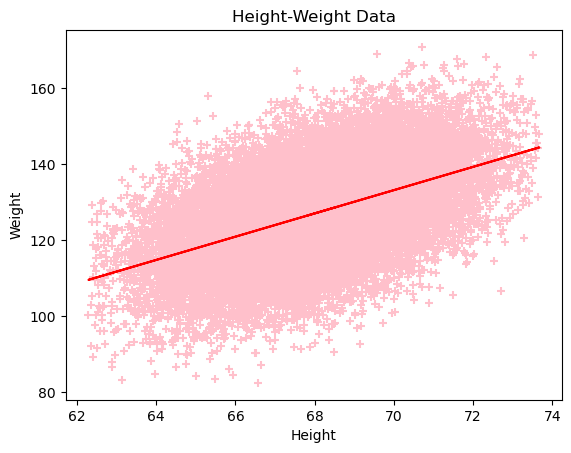

In [45]:
plt.scatter(df[['Height(Inches)']], df[['Weight(Pounds)']], color='pink', marker='+')
plt.plot(xtrain,reg.predict(xtrain), color='red')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Height-Weight Data')